In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from mplhep import *
linestyle_str = [
('solid', 'solid'), # Same as (0, ()) or '-'
('dotted', '.'),# Same as (0, (1, 1)) or '.'
('dashed', '--'),   # Same as '--'
('dashdot', '-.')]  # Same as '-.'
from matplotlib.pyplot import *
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')
from  matplotlib import *
mpl.rcParams['figure.figsize'] = (10,6)
import sympy as sy
sy.init_printing()
from sympy import *
%matplotlib inline

In [8]:
Mh_list = list(range(350, 2000, 100))
Sa_list = [0.2]
Mh, Sa = symbols('Mh Sa')
MW = 80.4
MZ = 91.2
Ca = sy.sqrt(1-Sa**2)
cw = MW/MZ
sw = sy.sqrt(1 - cw**2)
MU = 0.00255
MC = 1.27
MT = 172
MD = 0.00504
MS = 0.101
MB = 4.7
vev = 246
yt = np.sqrt(2)*MT/vev
MTA = 1.777
ytau = MTA*sy.sqrt(2)/vev
ee = (2*MW*sw)/vev
gqA =0
MZp = 2000
Mchi = 65
gchi = 1
ychi = 1.5
MSd = 140
vev2 = MZp/(2*gchi)
#gqL = (gqV + gqA)
#gqR = (gqV - gqA)
gZp = 1 
gsd = -2*gchi

In [9]:
def BRh(Mh_list, Sa_list):
    BRqq= []
    BRXdXd = []
    hqq_values = []
    hXdXd_values = []
    htotalW_values = []
    Ca = sy.sqrt(1 - Sa**2)
    lam3 = (MSd**2 - Mh**2)/(vev2*vev)*Sa*Ca
    lam2 = Mh**2/(2*vev2**2)*Sa**2 + MSd**2/(2*vev2**2)*Ca**2
    lam1 = Mh**2/(2*vev**2)*Ca**2 + MSd**2/(2*vev**2)*Sa**2
    hSdSd = ((Ca**6*lam3**2*vev**2 + 12*Ca**4*lam1*lam3*Sa**2*vev**2 - 4*Ca**4*lam3**2*Sa**2*vev**2 + 36*Ca**2*lam1**2*Sa**4*vev**2 - 24*Ca**2*lam1*lam3*Sa**4*vev**2 + 4*Ca**2*lam3**2*Sa**4*vev**2 - 12*Ca**5*lam2*lam3*Sa*vev*vev2 + 4*Ca**5*lam3**2*Sa*vev*vev2 - 72*Ca**3*lam1*lam2*Sa**3*vev*vev2 + 24*Ca**3*lam1*lam3*Sa**3*vev*vev2 + 24*Ca**3*lam2*lam3*Sa**3*vev*vev2 - 10*Ca**3*lam3**2*Sa**3*vev*vev2 - 12*Ca*lam1*lam3*Sa**5*vev*vev2 + 4*Ca*lam3**2*Sa**5*vev*vev2 + 36*Ca**4*lam2**2*Sa**2*vev2**2 - 24*Ca**4*lam2*lam3*Sa**2*vev2**2 + 4*Ca**4*lam3**2*Sa**2*vev2**2 + 12*Ca**2*lam2*lam3*Sa**4*vev2**2 - 4*Ca**2*lam3**2*Sa**4*vev2**2 + lam3**2*Sa**6*vev2**2)*sy.sqrt(Mh**4 - 4*Mh**2*MSd**2))/(32*sy.pi*abs(Mh)**3)
    hXdXd = ((-4*Mchi**2*Sa**2*ychi**2 + Mh**2*Sa**2*ychi**2)*sy.sqrt(-4*Mchi**2*Mh**2 + Mh**4))/(32*sy.pi*abs(Mh)**3)
    htata = ((Ca**2*Mh**2*ytau**2 - 4*Ca**2*MTA**2*ytau**2)*sy.sqrt(Mh**4 - 4*Mh**2*MTA**2))/(16*sy.pi*abs(Mh)**3)
    htt = ((3*Ca**2*Mh**2*yt**2 - 12*Ca**2*MT**2*yt**2)*sy.sqrt(Mh**4 - 4*Mh**2*MT**2))/(16*sy.pi*abs(Mh)**3)
    hWW = (((3*Ca**2*ee**4*vev**2)/(4*sw**4) + (Ca**2*ee**4*Mh**4*vev**2)/(16*MW**4*sw**4) - (Ca**2*ee**4*Mh**2*vev**2)/(4*MW**2*sw**4))*sy.sqrt(Mh**4 - 4*Mh**2*MW**2))/(16*sy.pi*abs(Mh)**3)
    SZpZp = ((192*Ca**2*gchi**4*gZp**4*vev2**2 + (16*Ca**2*gchi**4*gZp**4*MSd**4*vev2**2)/MZp**4 - (64*Ca**2*gchi**4*gZp**4*MSd**2*vev2**2)/MZp**2)*sy.sqrt(MSd**4 - 4*MSd**2*MZp**2))/(32*sy.pi*abs(MSd)**3)
    hZZ = (((9*Ca**2*ee**4*vev**2)/2. + (3*Ca**2*ee**4*Mh**4*vev**2)/(8*MZ**4) - (3*Ca**2*ee**4*Mh**2*vev**2)/(2*MZ**2) + (3*Ca**2*cw**4*ee**4*vev**2)/(4*sw**4) + (Ca**2*cw**4*ee**4*Mh**4*vev**2)/(16*MZ**4*sw**4) - (Ca**2*cw**4*ee**4*Mh**2*vev**2)/(4*MZ**2*sw**4) + (3*Ca**2*cw**2*ee**4*vev**2)/sw**2 + (Ca**2*cw**2*ee**4*Mh**4*vev**2)/(4*MZ**4*sw**2) - (Ca**2*cw**2*ee**4*Mh**2*vev**2)/(MZ**2*sw**2) + (3*Ca**2*ee**4*sw**2*vev**2)/cw**2 + (Ca**2*ee**4*Mh**4*sw**2*vev**2)/(4*cw**2*MZ**4) - (Ca**2*ee**4*Mh**2*sw**2*vev**2)/(cw**2*MZ**2) + (3*Ca**2*ee**4*sw**4*vev**2)/(4*cw**4) + (Ca**2*ee**4*Mh**4*sw**4*vev**2)/(16*cw**4*MZ**4) - (Ca**2*ee**4*Mh**2*sw**4*vev**2)/(4*cw**4*MZ**2))*sy.sqrt(Mh**4 - 4*Mh**2*MZ**2))/(32*sy.pi*abs(Mh)**3)                       
    hqq =  htt 
    htotalW = hqq + hXdXd + hWW + hZZ + hSdSd + htata
    
    for Mh_value in Mh_list:
        for Sa_value in Sa_list:
            hqq_value = hqq.subs({Mh: Mh_value, Sa: Sa_value}).evalf()
            htotalW_value = htotalW.subs({Mh: Mh_value, Sa: Sa_value}).evalf()
            hXdXd_value = hXdXd.subs({Mh: Mh_value, Sa: Sa_value}).evalf()
            hqq_values.append(hqq_value)
            htotalW_values.append(htotalW_value)
            hXdXd_values.append(hXdXd_value)
            BRqq.append((hqq_value / htotalW_value).evalf())
            BRXdXd.append((hXdXd_value / htotalW_value).evalf())
    return BRqq, BRXdXd, hqq_values, htotalW_values, hXdXd_values
BRqq_list, BRXdXd_list, hqq_list, htotalW_list, hXdXd_list = BRh(Mh_list, Sa_list)
BRqq_list
#hqq_list
#htotalW_list
#hXdXd_list
BRXdXd_list

In [10]:
Sa_list = [0.15]
BRqq_list3, BRXdXd_list3, hqq_list3, htotalW_list3, hXdXd_list3 = BRh(Mh_list, Sa_list)
BRqq_list3

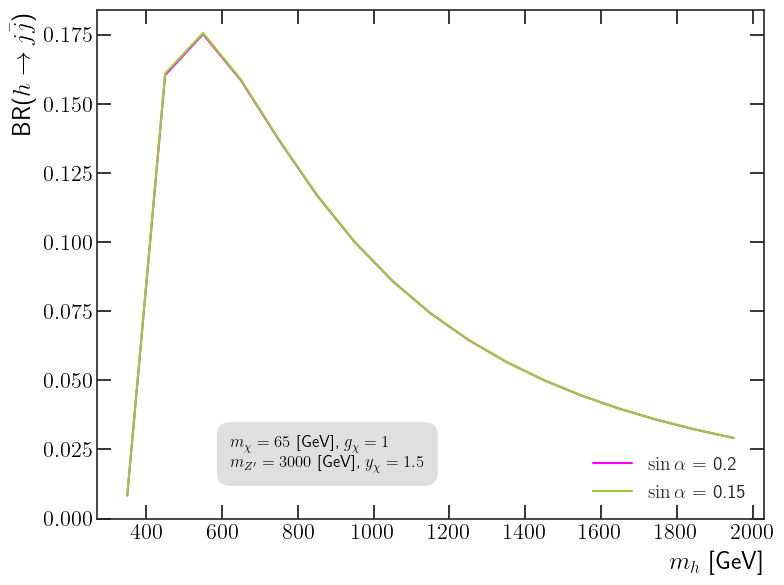

In [11]:
import seaborn as sns
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(Mh_list, BRqq_list, label=r'$\sin{\alpha} = $ 0.2 ', color='magenta', linestyle='solid')
#plt.plot(MSd_list, BRqq_list2, label=r'$\sin{\alpha} = $ 0.1 ', color='blue', linestyle='solid')
plt.plot(Mh_list, BRqq_list3, label=r'$\sin{\alpha}= $ 0.15', color='yellowgreen', linestyle='solid')
plt.xlabel(r'$m_{h}$ [GeV]', color='black',size=18,  labelpad=5, loc="right")
plt.ylabel(r'BR($h \rightarrow j \bar{j}$)',size=18, color='black',labelpad=5, loc="top")
ax.tick_params(axis='x', labelcolor='black', labelsize=14)
ax.tick_params(axis='y', labelcolor='black', labelsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
important_info = (r"$m_{\chi} = 65$ [GeV], $g_{\chi} = 1$",
                  r"$m_{Z^{\prime}} = 3000$ [GeV], $y_{\chi} = 1.5$")
multiline_info = "\n".join(important_info)   
plt.tight_layout()
ax.text(0.2, 0.1,  
        multiline_info,
        transform=ax.transAxes,
        fontsize=12,  
        color='black',
        #fontweight='bold',
        bbox=dict(
            facecolor='silver',
            alpha=0.5,
            edgecolor='silver',
            boxstyle='round,pad=0.8',
            linewidth=0.2
        ))    
#plt.yscale('log')
ax.tick_params(direction='in', length=10, width=1.1, colors='black', which='major', top=True, right=True)
ax.tick_params(direction='in', length=5, width=0.6, colors='black', which='minor', top=True, right=True)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_linewidth(1.2)
sns.despine(left=False, bottom=False, right=False, top=False, offset=None, trim=False)
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
legend = plt.legend(loc='lower right', fontsize=14)
legend.get_frame().set_alpha(0.0)
if not os.path.exists('plots/BRh'):
    os.makedirs('plots/BRh')
plt.savefig('plots/BRh/BRh_qq.pdf', bbox_inches='tight')
plt.show()

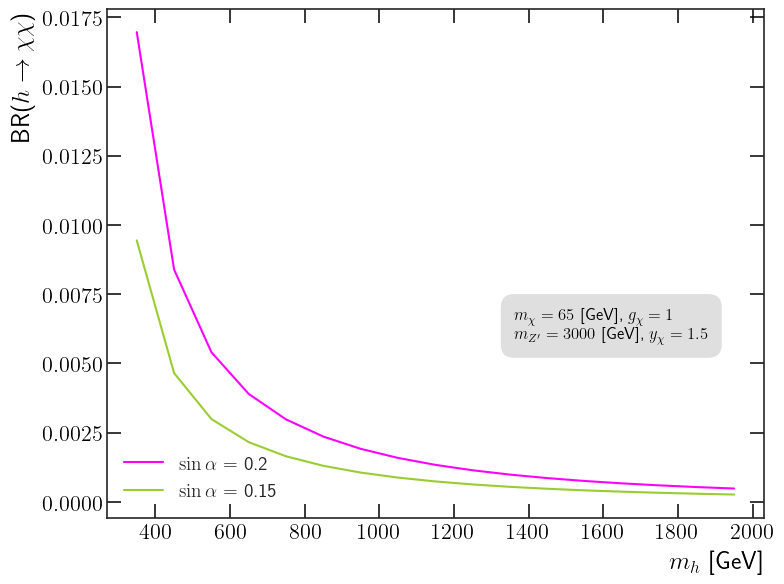

In [23]:
import seaborn as sns
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(Mh_list, BRXdXd_list, label=r'$\sin{\alpha} = $ 0.2 ', color='magenta', linestyle='solid')
#plt.plot(MSd_list, BRXdXd_list2, label=r'$\sin{\alpha} = $ 0.1 ', color='blue', linestyle='solid')
plt.plot(Mh_list, BRXdXd_list3, label=r'$\sin{\alpha}= $ 0.15', color='yellowgreen', linestyle='solid')
plt.xlabel(r'$m_{h}$ [GeV]', color='black',size=18,  labelpad=5, loc="right")
plt.ylabel(r'BR($h \rightarrow \chi \chi$)',size=18, color='black',labelpad=5, loc="top")
ax.tick_params(axis='x', labelcolor='black', labelsize=14)
ax.tick_params(axis='y', labelcolor='black', labelsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

multiline_info = "\n".join(important_info)   
plt.tight_layout()
ax.text(0.62, 0.35,  
        multiline_info,
        transform=ax.transAxes,
        fontsize=12,  
        color='black',
        #fontweight='bold',
        bbox=dict(
            facecolor='silver',
            alpha=0.5,
            edgecolor='silver',
            boxstyle='round,pad=0.8',
            linewidth=0.2
        ))    
#plt.yscale('log')
ax.tick_params(direction='in', length=10, width=1.1, colors='black', which='major', top=True, right=True)
ax.tick_params(direction='in', length=5, width=0.6, colors='black', which='minor', top=True, right=True)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_linewidth(1.2)
sns.despine(left=False, bottom=False, right=False, top=False, offset=None, trim=False)
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
legend = plt.legend(loc='lower left', fontsize=14)
legend.get_frame().set_alpha(0.0)
plt.savefig('plots/BRh/BRh_chichi.pdf', bbox_inches='tight')
plt.show()